In [1]:
# Importing the Packages and Machine learning libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
# Reading the CSV file

df = pd.read_csv('wine.csv')

In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Checking for NULL values

df.isnull().any().any()

False

In [6]:
df.corr()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [7]:
for col in df.columns.values:
    print("Number of unique values {} : {}".format(col,df[col].nunique()))

Number of unique values Wine : 3
Number of unique values Alcohol : 126
Number of unique values Malic.acid : 133
Number of unique values Ash : 79
Number of unique values Acl : 63
Number of unique values Mg : 53
Number of unique values Phenols : 97
Number of unique values Flavanoids : 132
Number of unique values Nonflavanoid.phenols : 39
Number of unique values Proanth : 101
Number of unique values Color.int : 132
Number of unique values Hue : 78
Number of unique values OD : 122
Number of unique values Proline : 121


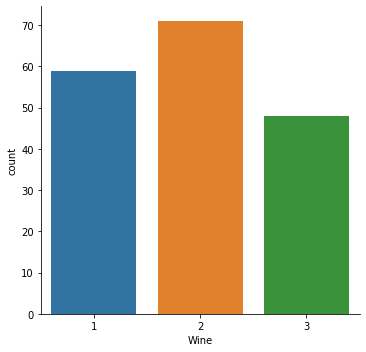

In [8]:
sns.catplot(x='Wine',data=df,kind='count')

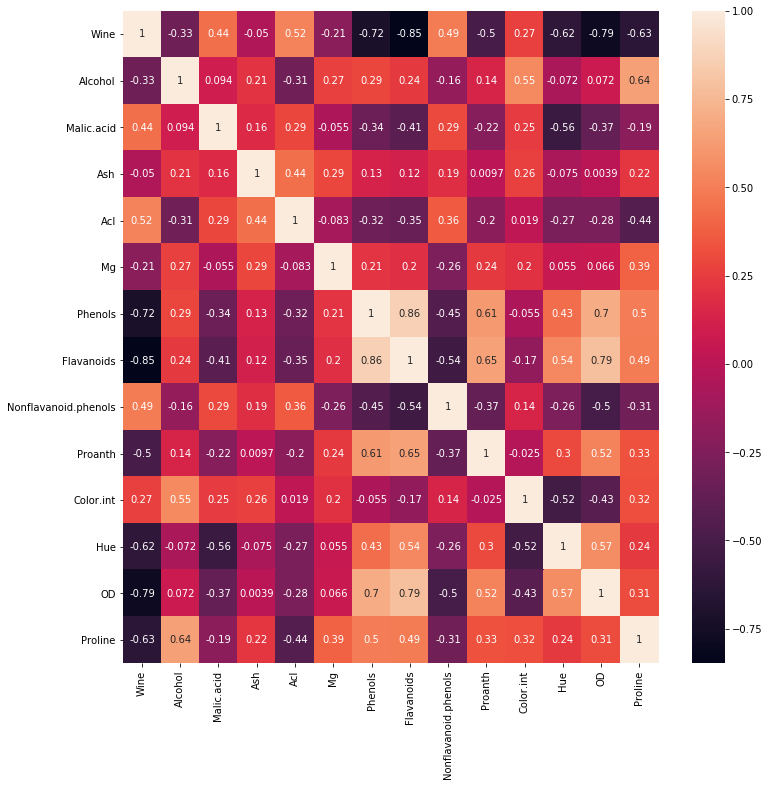

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), color='k', annot=True)

- Flavanoids has a strong positive correlation with OD, whereas it has a strong negative correlation with Wine class.
- OD & Wine class has high negative correlation.
- Again Phenols and Wine are highly negative correleated.
- Nonflavanoid.phenols & Wine has positive correlation.
- Proline & Alcohol has positive correlation.
- Pronath & Phenols has positive correlation.
- Malic.acid & Hue has negative correlation.
- Alcohol & Color.int has positive correlation.

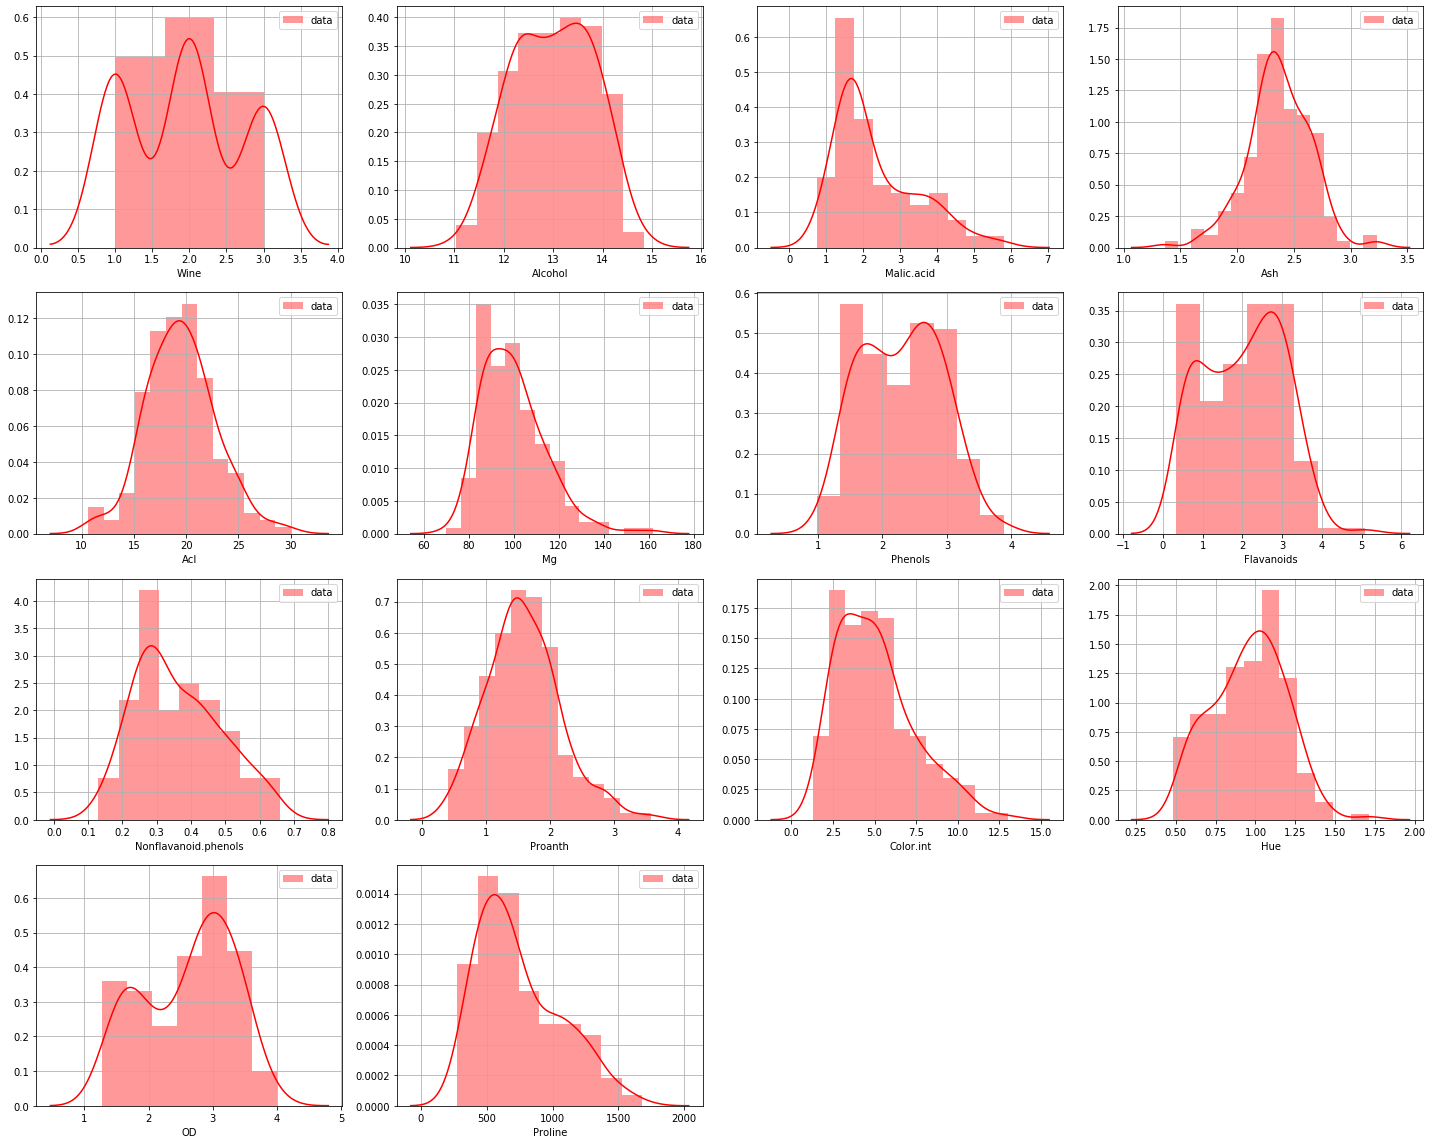

In [10]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
                       plt.subplot(4,4,i+1)
                       sns.distplot(df[col],color='r',kde=True,label='data')
                       plt.grid()
                       plt.legend(loc='upper right')
                       plt.tight_layout()

ACL, ALCOHOL, Hue and PRONATH featrue is approximately normally distributed
where as features like "PROLINE, PRONATH, Color.int, MALIC.ACID, MG, Nonflavanoid.phenols" are positively skewed.

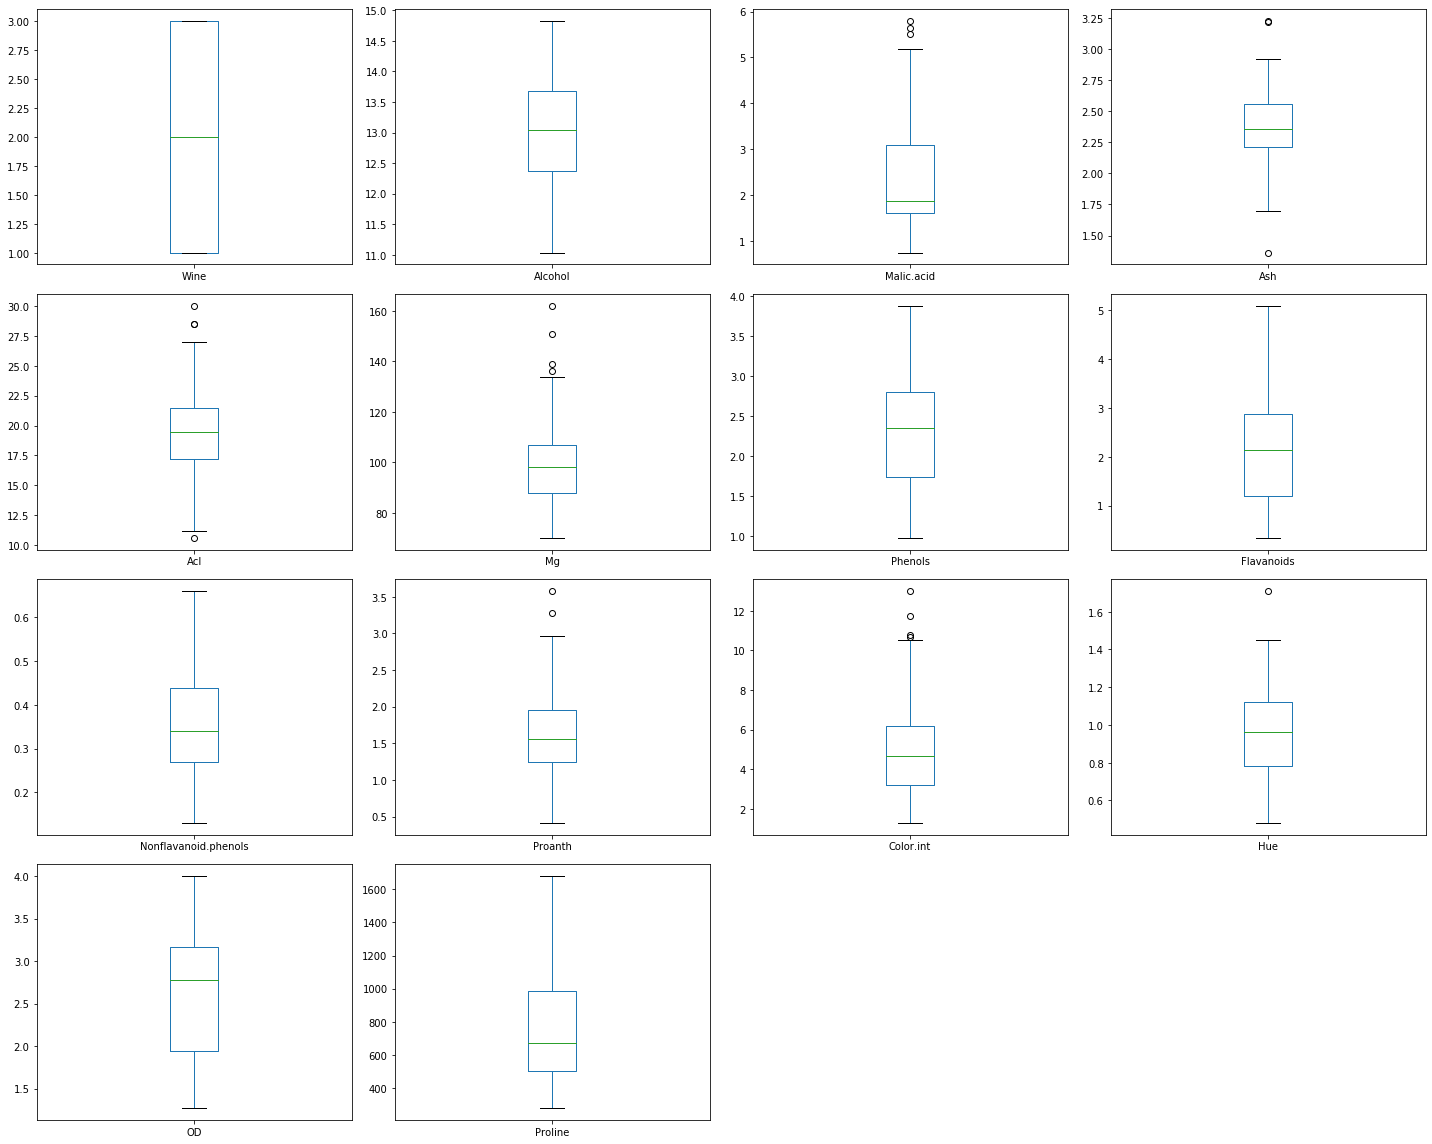

In [11]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
                       plt.subplot(4,4,i+1)
                       df.boxplot(col)
                       plt.grid()
                       plt.tight_layout()

We can see that few of the columns like "MALIC ACID, MG, COLOR.INT ans PROANTH" have got outliers.

In [12]:
# Defining the features & Target variable
inputs = df.drop(['Wine'],axis='columns')
targets = df['Wine']
x_train, x_test, y_train, y_test = train_test_split(inputs,targets,test_size=0.3 ,random_state=100)

In [13]:
targets.shape

(178,)

In [14]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
parameter_grid = {'C': [0.1, 1, 10, 100, 1000,],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), parameter_grid, refit = True, verbose = 4) 
  
# Fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.400, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.400, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.440, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.440, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.417, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.400, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.640, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.600, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.680, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.720, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [15]:
print(grid.best_params_)  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [16]:
x_test[:5]

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660


In [17]:
grid_predictions = grid.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        14
           2       0.80      0.84      0.82        19
           3       0.94      0.76      0.84        21

    accuracy                           0.85        54
   macro avg       0.85      0.87      0.86        54
weighted avg       0.86      0.85      0.85        54



In [18]:
from sklearn.metrics import accuracy_score
print(grid.best_score_)
print(accuracy_score(y_test, grid_predictions))

0.8470000000000001
0.8518518518518519
